In [678]:
import pandas as pd
Loan=pd.read_csv("Loan_default.csv")

In [679]:
Loan

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


# Analyszing the distribution of age,EmploymentType,Education,marital status,credit score,MonthlyEmployed,Loanterm to understand causes of defaulting of loans

In [680]:
age_distribution= Loan["Age"].value_counts()
employmenttype_distribution=Loan["EmploymentType"].value_counts()
education_distribution=Loan["Education"].value_counts()
maritalstatus_distribution=Loan["MaritalStatus"].value_counts()
creditscore_distribution=Loan["CreditScore"].value_counts()
monthlyEmployed_distribution=Loan["MonthsEmployed"].value_counts()
loanterm_distribution=Loan["LoanTerm"].value_counts()

In [681]:
age_distribution.head(),employmenttype_distribution,education_distribution,maritalstatus_distribution,creditscore_distribution.head(),monthlyEmployed_distribution.head(),loanterm_distribution.head()

(Age
 55    5064
 40    5056
 65    5027
 33    5022
 53    5010
 Name: count, dtype: int64,
 EmploymentType
 Part-time        64161
 Unemployed       63824
 Self-employed    63706
 Full-time        63656
 Name: count, dtype: int64,
 Education
 Bachelor's     64366
 High School    63903
 Master's       63541
 PhD            63537
 Name: count, dtype: int64,
 MaritalStatus
 Married     85302
 Divorced    85033
 Single      85012
 Name: count, dtype: int64,
 CreditScore
 630    528
 445    521
 829    520
 753    519
 670    515
 Name: count, dtype: int64,
 MonthsEmployed
 56     2227
 26     2223
 45     2220
 107    2207
 17     2198
 Name: count, dtype: int64,
 LoanTerm
 48    51166
 60    51154
 36    51061
 24    51009
 12    50957
 Name: count, dtype: int64)

In [682]:
# The predominant age among loan defaulters is 55, accompanied by a prevalent credit score of 528. Notably, individuals with part-time employment constitute the majority within this demographic.
# The majority of defaulters hold a Bachelor's degree, indicating a higher level of education among this group.

# Conducting an analysis to determine the proportion of defaulters.

In [683]:
def_loan = Loan[Loan["Default"] == 1]

In [684]:
common_age_range = (def_loan["Age"].min(), defaulters["Age"].max())

In [685]:
common_age_range

(18, 69)

In [686]:
loan_default_proportion = Loan ["Default"].value_counts(normalize=True) * 100
loan_default_proportion

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

In [687]:
# The analysis reveals that customers aged between 18 and 69 are the most common defaulters of loans. Recognizing these age brackets as potential risk factors can aid in mitigating loan default rates.
# This analysis aids in comprehending the factors underlying the demographic trends observed among loan defaulters among our customer base.

In [688]:
# Assessing the income distribution among high-value customers reveals a segment with lower risk potential, demonstrating their ability to fulfill loan obligations consistently.

In [689]:
monthly_income=Loan["Income"].describe()

In [690]:
monthly_income

count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64

In [691]:
# The analysis indicates that among customers, the mean income stands at 82,499.31, with a standard deviation of 38,963.01. This suggests a commendable performance from our customer base in terms of income stability.
# The range of income among customers spans from a minimum of $1,500.00 to a maximum of $149,999.00. This range suggests the potential for gradual recovery of loans over time from our diverse customer base.
# The 25th, 50th (median), and 75th percentiles are 48,825.50, 82,466.00, and 116,219.00, respectively.

# Performing an analysis on customers to discern factors conducive to loan repayment behavior.

In [692]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [693]:
import matplotlib.pyplot as plt
import seaborn as sns

In [694]:
# Analysis of EmploymentType by Income

In [695]:
income_by_employment = Loan.groupby("EmploymentType")["Income"].sum().reset_index()

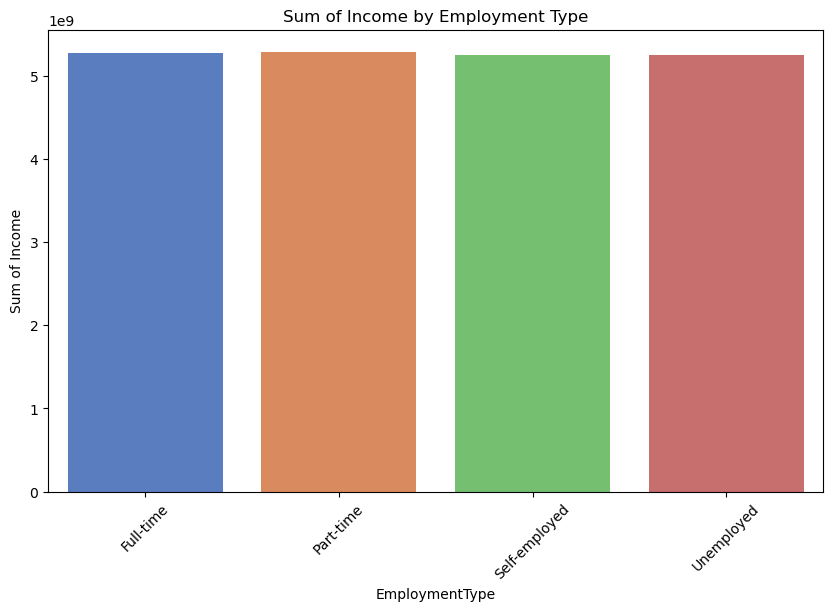

In [696]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=income_by_employment, x="EmploymentType", y='Income', palette='muted')
plt.xlabel("EmploymentType")
plt.ylabel("Sum of Income")
plt.title("Sum of Income by Employment Type")
plt.xticks(rotation=45)
plt.show()

In [697]:
print(sum_income_by_employmenttype)

  EmploymentType  TotalIncome
0      Full-time   5276464807
1      Part-time   5286183558
2  Self-employed   5252350046
3     Unemployed   5250951520


In [698]:
# Analysing Default by Age

In [699]:
default_by_age = Loan.groupby("Age")["Default"].sum().reset_index()

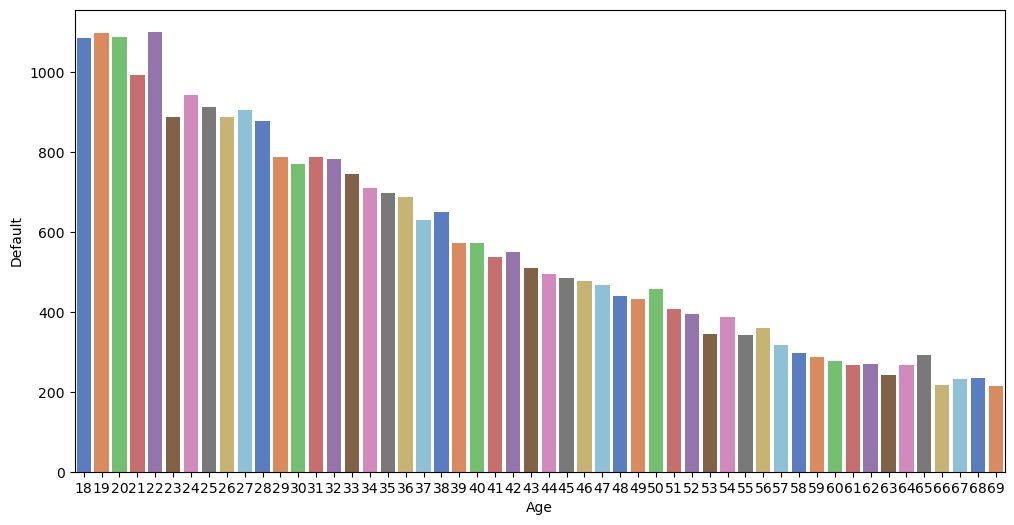

In [700]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=default_by_age, x="Age", y="Default", palette='muted')
plt.show()

In [701]:
print(defaults_by_age)

    Age  Default
0    18     1084
1    19     1096
2    20     1086
3    21      992
4    22     1100
5    23      887
6    24      943
7    25      912
8    26      887
9    27      905
10   28      876
11   29      788
12   30      769
13   31      788
14   32      781
15   33      745
16   34      709
17   35      696
18   36      688
19   37      629
20   38      650
21   39      571
22   40      573
23   41      536
24   42      549
25   43      509
26   44      494
27   45      485
28   46      478
29   47      468
30   48      439
31   49      433
32   50      458
33   51      408
34   52      394
35   53      344
36   54      388
37   55      343
38   56      360
39   57      318
40   58      297
41   59      286
42   60      277
43   61      266
44   62      269
45   63      243
46   64      268
47   65      291
48   66      217
49   67      231
50   68      235
51   69      214


In [702]:
defaults_by_maritalstatus = Loan.groupby("MaritalStatus")["Default"].sum().reset_index()


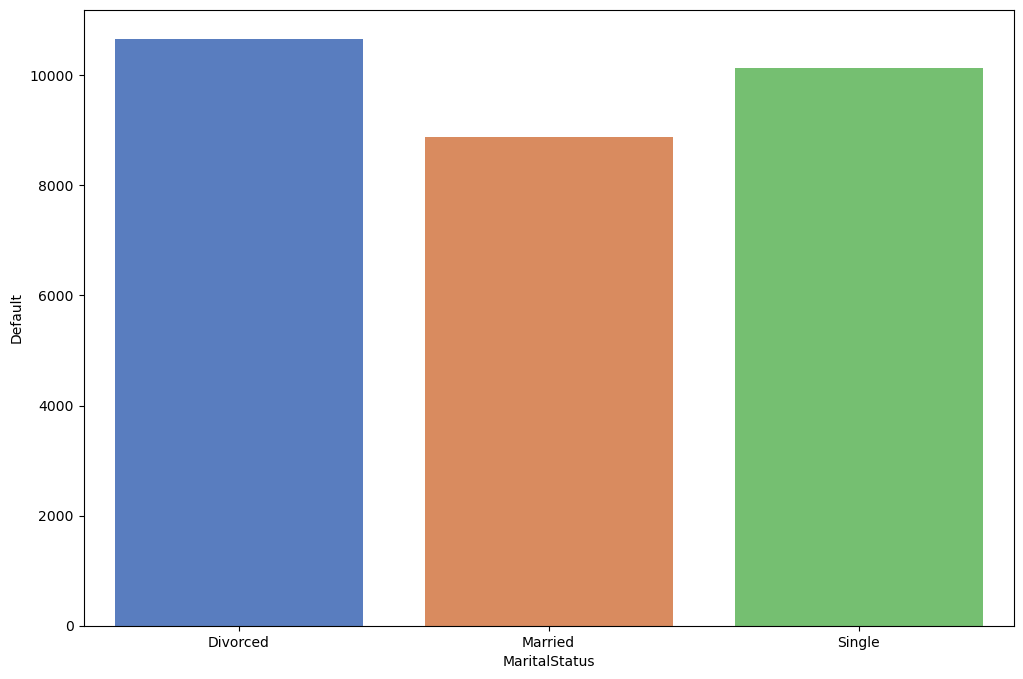

In [703]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=defaults_by_maritalstatus, x='MaritalStatus', y='Default', palette='muted')
plt.show()

In [704]:
print(defaults_by_maritalstatus)

  MaritalStatus  Default
0      Divorced    10657
1       Married     8869
2        Single    10127


In [707]:
marital_status_by_employmenttype = Loan.groupby(["MaritalStatus", "EmploymentType"]).size().reset_index(name="Count")

NameError: name 'plot' is not defined

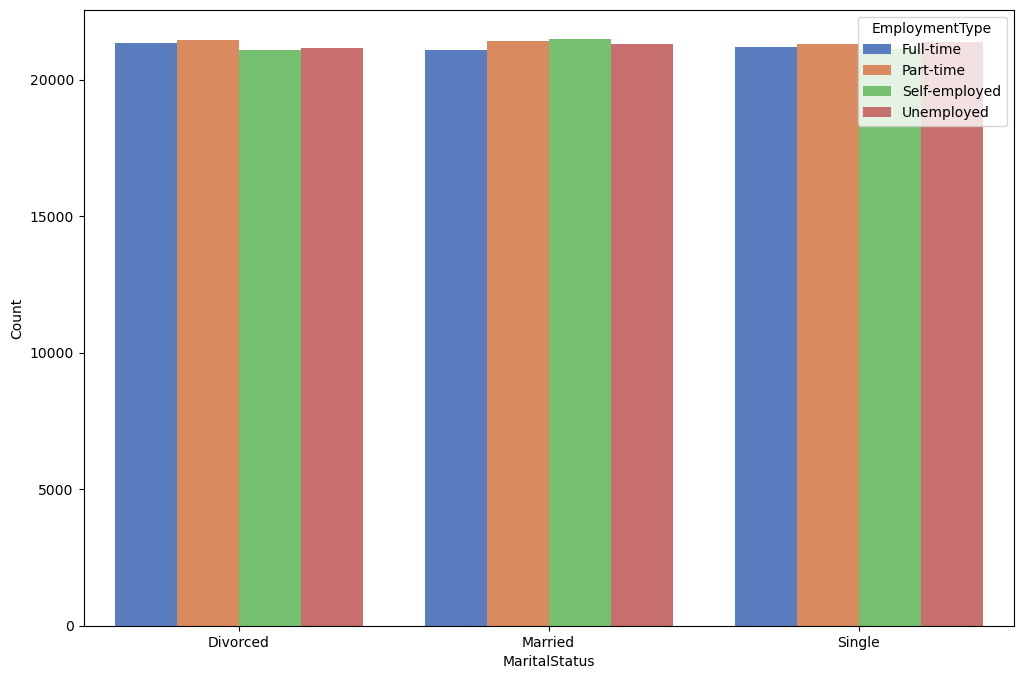

In [708]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=marital_status_by_employmenttype, x='MaritalStatus', y='Count', hue='EmploymentType', palette='muted')
plot.show()

In [709]:
print(marital_status_by_employmenttype)

   MaritalStatus EmploymentType  Count
0       Divorced      Full-time  21350
1       Divorced      Part-time  21460
2       Divorced  Self-employed  21079
3       Divorced     Unemployed  21144
4        Married      Full-time  21091
5        Married      Part-time  21406
6        Married  Self-employed  21489
7        Married     Unemployed  21316
8         Single      Full-time  21215
9         Single      Part-time  21295
10        Single  Self-employed  21138
11        Single     Unemployed  21364


In [710]:
mean_income_by_purpose = Loan.groupby("LoanPurpose")["Income"].mean().reset_index()

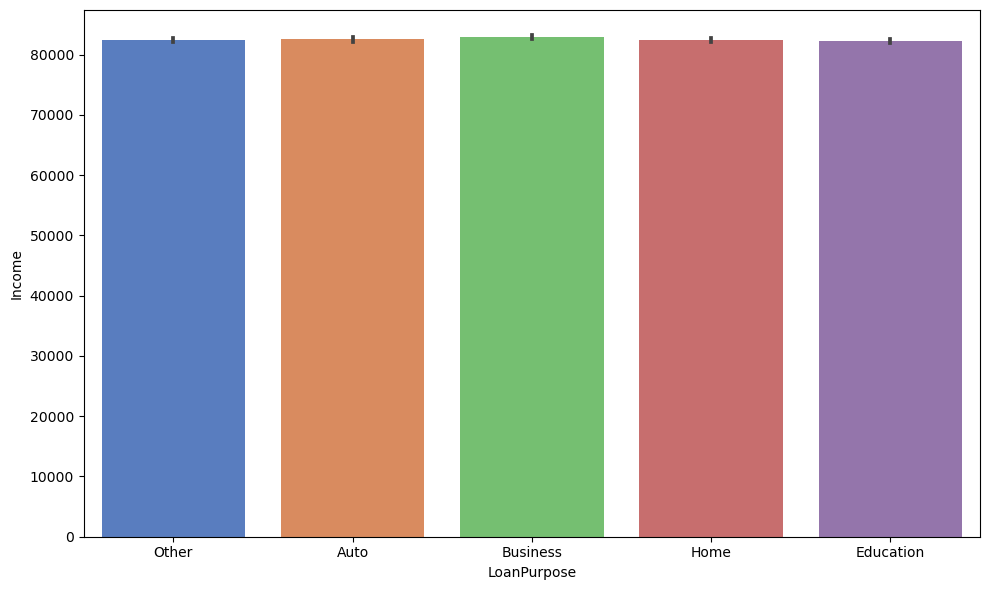

In [711]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=Loan, x="LoanPurpose", y="Income", palette='muted')
plt.tight_layout()
plt.show()

In [712]:
print(mean_income_by_purpose)

  LoanPurpose        Income
0        Auto  82508.299504
1    Business  82897.470798
2   Education  82217.746064
3        Home  82402.193523
4       Other  82469.035216


In [713]:
# The loan purpose for each customer varies slightly, with most aligning closely with their mean income. Notably, those seeking loans for business purposes rank highest.

In [714]:
avg_loan_amount_by_term = Loan.groupby("LoanTerm")["LoanAmount"].mean().reset_index()

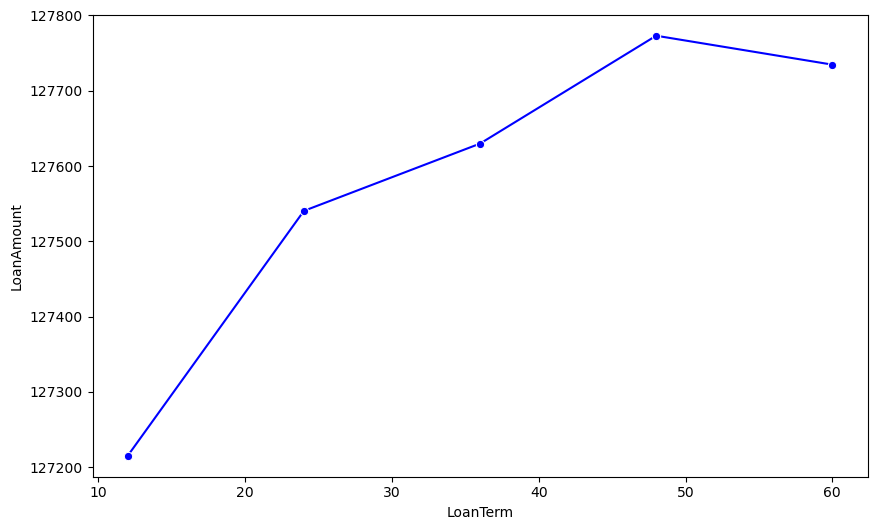

In [715]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_loan_amount_by_term, x="LoanTerm", y="LoanAmount", marker='o', color='blue')
plt.show()

In [716]:
print(avg_loan_amount_by_term)

   LoanTerm     LoanAmount
0        12  127215.034284
1        24  127540.348311
2        36  127629.742347
3        48  127773.078822
4        60  127734.660398


In [ ]:
# The trend indicates an upward trend in loan term repayment, starting from 12 months and increasing. This suggests that spreading the loan term over various durations facilitates easier repayment for clients.